## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#Import all the necessary modules
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.simplefilter('ignore')

In [2]:
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets: 
#1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
#2 sex - student's sex (binary: 'F' - female or 'M' - male) 
#3 age - student's age (numeric: from 15 to 22) 
#4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
#5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
#6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
#7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
#8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
#9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
#10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
#11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
#12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
#13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
#14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
#15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
#16 schoolsup - extra educational support (binary: yes or no) 
#17 famsup - family educational support (binary: yes or no) 
#18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
#19 activities - extra-curricular activities (binary: yes or no) 
#20 nursery - attended nursery school (binary: yes or no) 
#21 higher - wants to take higher education (binary: yes or no) 
#22 internet - Internet access at home (binary: yes or no) 
#23 romantic - with a romantic relationship (binary: yes or no) 
#24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
#25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
#26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
#27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
#28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
#29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
#30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
#31 G1 - first period grade (numeric: from 0 to 20) 
#32 G2 - second period grade (numeric: from 0 to 20) 
#33 G3 - final grade (numeric: from 0 to 20, output target)

In [3]:
#use students-data.csv

#using the new CSV file given
filename = "students-data.csv"
studentDF = pd.read_csv(filename, delimiter=";")

#Find the missing value. 
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", studentDF.isna().sum())
print("Null values\n", studentDF.isnull().sum())

#Look at the unique values of class values.
#the unique values of class values
#print("\nUnique values of attribute - class", studentDF["class"].unique())

#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for studentClass in studentDF.items():
    print(studentClass[0], studentClass[1].nunique())
    if(studentClass[1].nunique() < 10):
        print(studentClass[1].unique())

print(studentDF.info())

NA values
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
Null values
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Wal

In [4]:
studentDF.head(10)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob ...  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher ...   
1     GP   F   17       U     GT3       T     1     1   at_home     other ...   
2     GP   F   15       U     LE3       T     1     1   at_home     other ...   
3     GP   F   15       U     GT3       T     4     2    health  services ...   
4     GP   F   16       U     GT3       T     3     3     other     other ...   
5     GP   M   16       U     LE3       T     4     3  services     other ...   
6     GP   M   16       U     LE3       T     2     2     other     other ...   
7     GP   F   17       U     GT3       A     4     4     other   teacher ...   
8     GP   M   15       U     LE3       A     3     2  services     other ...   
9     GP   M   15       U     GT3       T     3     4     other     other ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  
5      5        4      2     1     2      5       10  15  15  15  
6      4        4      4     1     1      3        0  12  12  11  
7      4        1      4     1     1      1        6   6   5   6  
8      4        2      2     1     1      1        0  16  18  19  
9      5        5      1     1     1      5        0  14  15  15  

[10 rows x 33 columns]

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [5]:
studentDF.index.name = 'number'
studentDF.head(2)

school sex  age address famsize Pstatus  Medu  Fedu     Mjob     Fjob  \
number                                                                         
0          GP   F   18       U     GT3       A     4     4  at_home  teacher   
1          GP   F   17       U     GT3       T     1     1  at_home    other   

       ... famrel freetime  goout  Dalc  Walc health absences G1 G2 G3  
number ...                                                              
0      ...      4        3      4     1     1      3        6  5  6  6  
1      ...      5        3      3     1     1      3        4  5  5  6  

[2 rows x 33 columns]

In [6]:
#No missing data or missing values were found in the previous analysis made above

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
#check for the data types which are not numerical
print(studentDF.select_dtypes(exclude=np.number).columns)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [8]:
# Select independent variables that are numeric
#3 age - student's age (numeric: from 15 to 22) 
#7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
#8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
#13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
#14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
#15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
#24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
#25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
#26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
#27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
#28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
#29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
#30 absences - number of school absences (numeric: from 0 to 93) 

variables = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
for vari in variables:
    if(studentDF[vari].var() < 1):
        print("Dropped - ", vari, "with variance ", studentDF[vari].var())
        studentDF.drop(vari, axis=1, inplace=True)

Dropped -  traveltime with variance  0.4865128831202245
Dropped -  studytime with variance  0.704324359056738
Dropped -  failures with variance  0.553016770545522
Dropped -  famrel with variance  0.8039966587418893
Dropped -  freetime with variance  0.9977253742851635
Dropped -  Dalc with variance  0.7934202917175335


In [9]:
studentDF.sample(3).transpose()

number             64          174     106
school              GP          GP      GP
sex                  F           F       F
age                 15          16      15
address              U           U       U
famsize            LE3         LE3     GT3
Pstatus              T           T       T
Medu                 4           3       2
Fedu                 3           3       2
Mjob          services       other   other
Fjob          services       other   other
reason      reputation  reputation  course
guardian        father      mother  mother
schoolsup          yes          no     yes
famsup              no         yes     yes
paid                no         yes     yes
activities         yes         yes      no
nursery            yes         yes     yes
higher             yes         yes     yes
internet           yes         yes     yes
romantic           yes          no      no
goout                4           5       2
Walc                 4           1       1
health               2           4       3
absences             0           4       8
G1                  10          10       7
G2                  10          11       8
G3                  10           9       8

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [10]:
#check for the data in these columns and encode them to numeric
for studentClass in studentDF.select_dtypes(exclude=np.number).columns:
    print("Column name", studentClass)
    print("Before encoding")
    print(studentDF[studentClass].dtype, studentDF[studentClass].unique())
    print("After encoding")
    #LabelEncoder encodes string into numeric values. Pass the class feature to fit transform to transform to numeric values
    encoder = preprocessing.LabelEncoder()
    studentDF[studentClass] = encoder.fit_transform(studentDF[studentClass])
    #check if the class has changed to numeric values and the datatype is also numeric
    print(studentDF[studentClass].dtype, studentDF[studentClass].unique())

Column name school
Before encoding
object ['GP' 'MS']
After encoding
int64 [0 1]
Column name sex
Before encoding
object ['F' 'M']
After encoding
int64 [0 1]
Column name address
Before encoding
object ['U' 'R']
After encoding
int64 [1 0]
Column name famsize
Before encoding
object ['GT3' 'LE3']
After encoding
int64 [0 1]
Column name Pstatus
Before encoding
object ['A' 'T']
After encoding
int64 [0 1]
Column name Mjob
Before encoding
object ['at_home' 'health' 'other' 'services' 'teacher']
After encoding
int64 [0 1 2 3 4]
Column name Fjob
Before encoding
object ['teacher' 'other' 'services' 'health' 'at_home']
After encoding
int64 [4 2 3 1 0]
Column name reason
Before encoding
object ['course' 'other' 'home' 'reputation']
After encoding
int64 [0 2 1 3]
Column name guardian
Before encoding
object ['mother' 'father' 'other']
After encoding
int64 [1 0 2]
Column name schoolsup
Before encoding
object ['yes' 'no']
After encoding
int64 [1 0]
Column name famsup
Before encoding
object ['no' 'yes']


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [11]:
target = "Result"
studentDF[target]=((studentDF.G1 >=10)&(studentDF.G2 >=10)&(studentDF.G3 >=10))
encoder = preprocessing.LabelEncoder()
studentDF[target] = encoder.fit_transform(studentDF[target])
studentDF.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
number                                                                        
0            0    0   18        1        0        0     4     4     0     4   
1            0    0   17        1        0        1     1     1     0     2   
2            0    0   15        1        1        1     1     1     0     2   
3            0    0   15        1        0        1     4     2     1     3   
4            0    0   16        1        0        1     3     3     2     2   

         ...    internet  romantic  goout  Walc  health  absences  G1  G2  G3  \
number   ...                                                                    
0        ...           0         0      4     1       3         6   5   6   6   
1        ...           1         0      3     1       3         4   5   5   6   
2        ...           1         0      2     3       3        10   7   8  10   
3        ...           1         1      2     1       5         2  15  14  15   
4        ...           0         0      2     2       5         4   6  10  10   

        Result  
number          
0            0  
1            0  
2            0  
3            1  
4            0  

[5 rows x 28 columns]

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [12]:
target = "Result"
#Preparing Y - Feature to be learnt and then identified
Y = studentDF[target]
#Preparing X - All required columns except the identified Y & number which has no significance
X = studentDF.drop([target],axis=1)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

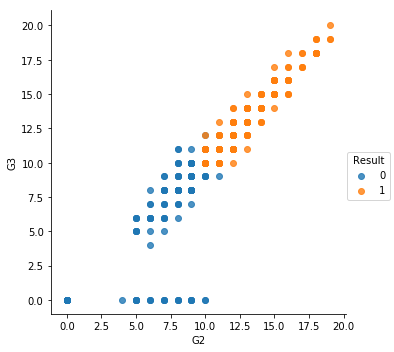

In [13]:
target = "Result"
sns.lmplot('G2', 'G3', data=studentDF, hue=target, fit_reg=False)
plt.show()


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


In [14]:
(studentDF[["G1", "G2", "G3"]].corr())

G1        G2        G3
G1  1.000000  0.852118  0.801468
G2  0.852118  1.000000  0.904868
G3  0.801468  0.904868  1.000000

In [15]:
#understanding
#1. Student who scores more than 12.5 in G2 scores more than 10 in G3
#2. Most of the students score lesser in G3 if they have scored less than 10 in G2
#3. Student possibibly give up in G3 since they have scored less in G2 as anyway they fail
#4. There is a high coorelation between G2 and G3 - better than G1 with G2 and G3 
#    [Second period grade has high influence on final grade]

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

Plot for  age


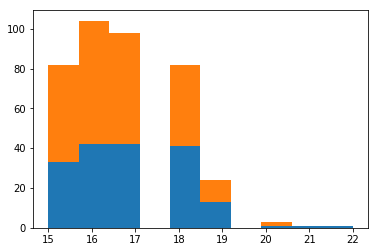

Plot for  school


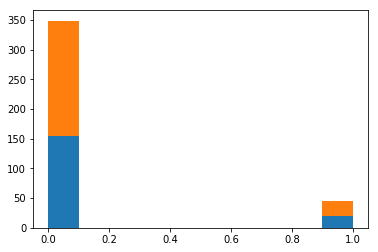

In [16]:
target = "Result"
columns = ["age", "school"]
for col in columns:
    print("Plot for ", col)
    histData = [studentDF[col][studentDF[target]==cls_name] for cls_name in [0, 1]]
    plt.hist(histData, histtype='bar', stacked=True)
    plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [17]:
#Get the X & Y split into 300 rows of training data and balance as testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=((len(Y)-300)/len(Y)),random_state=5)
print("Count of training data - ", len(Y_train))
print("Count of testing data - ", len(Y_test))

Count of training data -  300
Count of testing data -  95


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [18]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
# predit the Y using Logit
Y_pred_train = logreg.predict(X_train)
#Training set metrics
confusion_matrix = metrics.confusion_matrix(Y_train, Y_pred_train)
print("Confusion matrix")
print(confusion_matrix)
print("F1 score, Precision and Recall")
print(metrics.classification_report(Y_train, Y_pred_train))
print("Training Accuracy", logreg.score(X_train, Y_train))
print("Analysis of confusion matrix")
print("True positive: correctly predicted as fail - ", confusion_matrix[0,0])
print("True negative: correctly predicted as pass - ", confusion_matrix[1,1])
print("False positive: wrongly predicted as fail - ", confusion_matrix[0,1])
print("False negative: wrongly predicted as pass - ", confusion_matrix[1,0])

Confusion matrix
[[127   5]
 [  3 165]]
F1 score, Precision and Recall
             precision    recall  f1-score   support

          0       0.98      0.96      0.97       132
          1       0.97      0.98      0.98       168

avg / total       0.97      0.97      0.97       300

Training Accuracy 0.9733333333333334
Analysis of confusion matrix
True positive: correctly predicted as fail -  127
True negative: correctly predicted as pass -  165
False positive: wrongly predicted as fail -  5
False negative: wrongly predicted as pass -  3


In [20]:
# predit the Y using Logit
Y_pred = logreg.predict(X_test)
#Testing set metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix")
print(confusion_matrix)
print("F1 score, Precision and Recall")
print(metrics.classification_report(Y_test, Y_pred))
print("Testing Accuracy", logreg.score(X_test, Y_test))
print("Analysis of confusion matrix")
print("True positive: correctly predicted as fail - ", confusion_matrix[0,0])
print("True negative: correctly predicted as pass - ", confusion_matrix[1,1])
print("False positive: wrongly predicted as fail - ", confusion_matrix[0,1])
print("False negative: wrongly predicted as pass - ", confusion_matrix[1,0])

Confusion matrix
[[41  1]
 [ 3 50]]
F1 score, Precision and Recall
             precision    recall  f1-score   support

          0       0.93      0.98      0.95        42
          1       0.98      0.94      0.96        53

avg / total       0.96      0.96      0.96        95

Testing Accuracy 0.9578947368421052
Analysis of confusion matrix
True positive: correctly predicted as fail -  41
True negative: correctly predicted as pass -  50
False positive: wrongly predicted as fail -  1
False negative: wrongly predicted as pass -  3


# Naive bayes with Iris data

### Import Iris.csv

In [21]:
#use students-data.csv

#using the new CSV file given
filename = "iris.csv"
irisDF = pd.read_csv(filename)

#Find the missing value. 
#Get missing values isna gives true or false for every cell; total the true's which is 1 to get the null totals
print("NA values\n", irisDF.isna().sum())
print("Null values\n", irisDF.isnull().sum())


NA values
 Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64
Null values
 Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64


In [22]:
#take median and update it in the Iris dataset.
irisDF.fillna(irisDF.median(), inplace=True)
#Verify if there are no nulls
print(irisDF.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [23]:
#Look at the unique values of class values.
#the unique values of class values

#checking the number of unique values of other attributes
print("\nNumber of unique values of other attributes")
for irisClass in irisDF.items():
    print(irisClass[0], irisClass[1].nunique())
    if(irisClass[1].nunique() < 10):
        print(irisClass[1].unique())


Number of unique values of other attributes
Id 152
SepalLengthCm 35
SepalWidthCm 23
PetalLengthCm 44
PetalWidthCm 22
Species 3
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [24]:
le = preprocessing.LabelEncoder()
irisDF['Species'] = le.fit_transform(irisDF['Species'])
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [25]:
irisDF.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  152.000000     152.000000    152.000000     152.000000    152.000000   
mean    76.500000       5.843421      3.053289       3.766447      1.203289   
std     44.022721       0.822584      0.430757       1.754000      0.759698   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.750000       5.100000      2.800000       1.600000      0.300000   
50%     76.500000       5.800000      3.000000       4.350000      1.300000   
75%    114.250000       6.400000      3.300000       5.100000      1.800000   
max    152.000000       7.900000      4.400000       6.900000      2.500000   

          Species  
count  152.000000  
mean     1.013158  
std      0.821780  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [26]:
target = "Species"
#Preparing Y - Feature to be learnt and then identified
Y = irisDF[target]
#Preparing X - All required columns except the identified Y & number which has no significance
X = irisDF.drop(["Id", "SepalWidthCm", target],axis=1)

In [27]:
X.head(2)

SepalLengthCm  PetalLengthCm  PetalWidthCm
0            5.1            1.4           0.2
1            4.9            1.4           0.2

In [28]:
Y.head(2)

0    0
1    0
Name: Species, dtype: int64

### Find the distribution of target variable (Class)

In [29]:
pd.value_counts(Y)

2    52
1    50
0    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

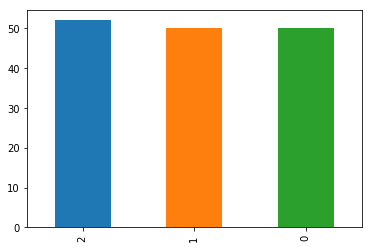

In [30]:
pd.value_counts(Y).plot(kind="bar")
plt.show()

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

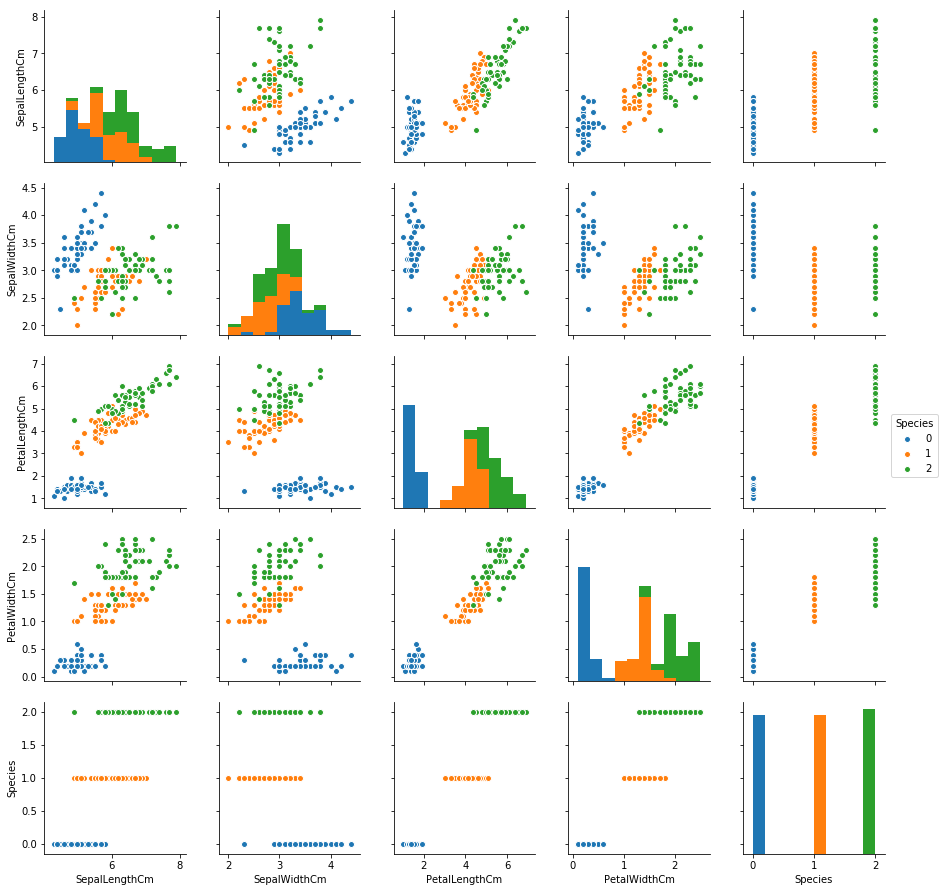

In [31]:
sns.pairplot(irisDF.iloc[:,1:], hue="Species")
plt.show()

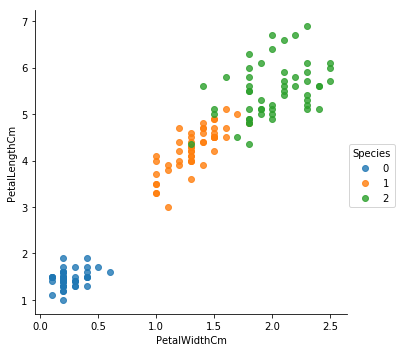

From this Species 0 is fully seperable based on Petal length and Petal width
PetalWidth and PetalLength are also important classifiers in distinguishing the class


In [32]:
sns.lmplot('PetalWidthCm', 'PetalLengthCm', data=irisDF, hue="Species", fit_reg=False)
plt.show()
print("From this Species 0 is fully seperable based on Petal length and Petal width")
print("PetalWidth and PetalLength are also important classifiers in distinguishing the class")

### Summary Statistics and explain insights for at least 2 variables

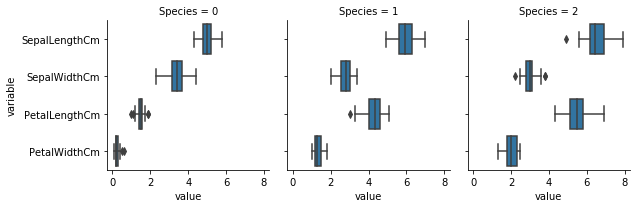

In [33]:
g = sns.FacetGrid(pd.melt(irisDF.iloc[:,1:], id_vars='Species'), col='Species')
g.map(sns.boxplot, 'value', 'variable')
plt.show()

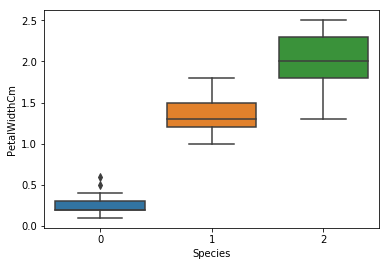

PetalWidth can clearly seperate Species 0


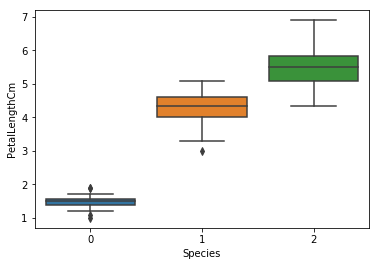

PetalLength can clearly seperate Species 0


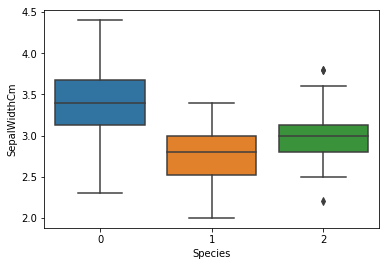

SepalWidth is not very useful in distinguishing between Species


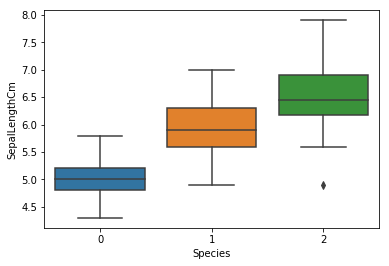

SepalLength can clearly seperate Species 0 snd can also be used as a feature to distinguish Species 1 & 2


In [34]:
#visualize the features with respect to target
sns.boxplot(x="Species", y="PetalWidthCm", data=irisDF)
plt.show()
print("PetalWidth can clearly seperate Species 0")
sns.boxplot(x="Species", y="PetalLengthCm", data=irisDF)
plt.show()
print("PetalLength can clearly seperate Species 0")
sns.boxplot(x="Species", y="SepalWidthCm", data=irisDF)
plt.show()
print("SepalWidth is not very useful in distinguishing between Species")
sns.boxplot(x="Species", y="SepalLengthCm", data=irisDF)
plt.show()
print("SepalLength can clearly seperate Species 0 snd can also be used as a feature to distinguish Species 1 & 2")

### Correlation among all variables and give your insights

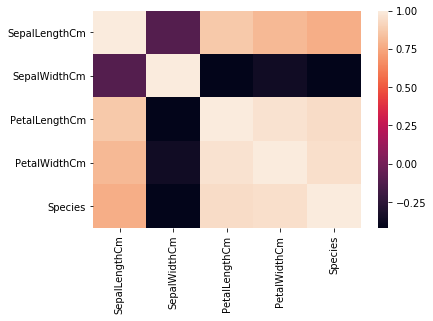

Already visualized inference can also be seen from the correlation table and heat map
Features SepalLength, PetalLength and Petal Width can be used for determining Species


In [35]:
sns.heatmap(irisDF.iloc[:,1:].corr())
plt.show()
irisDF.iloc[:,1:].corr() > 0.75
print("Already visualized inference can also be seen from the correlation table and heat map")
print("Features SepalLength, PetalLength and Petal Width can be used for determining Species")

### Split data in Training and Validation in 80:20

In [36]:
#Get the X & Y split into 80% training data nad 20% testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,random_state=5)

### Do Feature Scaling

In [37]:
#scale the value of training to ensure that big numbers dont bias the result
sc=StandardScaler()
scaledX_train = sc.fit_transform(X_train)
scaledX_test = sc.transform(X_test)

### Train and Fit NaiveBayes Model

In [38]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
modelNB = GaussianNB()
# Train the model using the training sets
modelNB.fit(X_train, Y_train)

GaussianNB(priors=None)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [39]:
# predit the Y using Logit
Y_pred = modelNB.predict(X_test)
#Testing set metrics
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("Confusion matrix")
print(confusion_matrix)
print("F1 score, Precision and Recall")
print(metrics.classification_report(Y_test, Y_pred))
print("Testing Accuracy", modelNB.score(X_test, Y_test))
i = 0
while i < 3:
    j = 0
    print("Actual is Species", i)
    while j < 3:
        if i == j:
            #This is True Positive For corresponding class i
            print("True:  Predicted as Species ", j , "is", confusion_matrix[i,j])
        elif i > j:
            #
            print("False: Predicted as Species ", j , "is", confusion_matrix[i,j])
        else:
            #
            print("False: Predicted as Species ", i , "is", confusion_matrix[i,j])
        j = j+1
    print("")
    i = i+1 

Confusion matrix
[[ 9  0  0]
 [ 0 10  1]
 [ 0  2  9]]
F1 score, Precision and Recall
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.83      0.91      0.87        11
          2       0.90      0.82      0.86        11

avg / total       0.91      0.90      0.90        31

Testing Accuracy 0.9032258064516129
Actual is Species 0
True:  Predicted as Species  0 is 9
False: Predicted as Species  0 is 0
False: Predicted as Species  0 is 0

Actual is Species 1
False: Predicted as Species  0 is 0
True:  Predicted as Species  1 is 10
False: Predicted as Species  1 is 1

Actual is Species 2
False: Predicted as Species  0 is 0
False: Predicted as Species  1 is 2
True:  Predicted as Species  2 is 9



In [40]:
# predit the Y using Logit
Y_pred_train = modelNB.predict(X_train)
#Training set metrics
confusion_matrix = metrics.confusion_matrix(Y_train, Y_pred_train)
print("Confusion matrix")
print(confusion_matrix)
print("F1 score, Precision and Recall")
print(metrics.classification_report(Y_train, Y_pred_train))
print("Training Accuracy", modelNB.score(X_train, Y_train))
i = 0
while i < 3:
    j = 0
    print("Actual is Species", i)
    while j < 3:
        if i == j:
            #This is True Positive For corresponding class i
            print("True:  Predicted as Species ", j , "is", confusion_matrix[i,j])
        elif i > j:
            #
            print("False: Predicted as Species ", j , "is", confusion_matrix[i,j])
        else:
            #
            print("False: Predicted as Species ", i , "is", confusion_matrix[i,j])
        j = j+1
    print("")
    i = i+1 

Confusion matrix
[[41  0  0]
 [ 0 37  2]
 [ 0  3 38]]
F1 score, Precision and Recall
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        41
          1       0.93      0.95      0.94        39
          2       0.95      0.93      0.94        41

avg / total       0.96      0.96      0.96       121

Training Accuracy 0.9586776859504132
Actual is Species 0
True:  Predicted as Species  0 is 41
False: Predicted as Species  0 is 0
False: Predicted as Species  0 is 0

Actual is Species 1
False: Predicted as Species  0 is 0
True:  Predicted as Species  1 is 37
False: Predicted as Species  1 is 2

Actual is Species 2
False: Predicted as Species  0 is 0
False: Predicted as Species  1 is 3
True:  Predicted as Species  2 is 38

